In [1]:
import pandas as pd
import json

try:
    df = pd.read_json('Musical_Instruments_5.json', lines=True)
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Musical_Instruments_5.json' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


(10261, 9)


In [3]:
# Examine data types
print(df.dtypes)

# Determine the number of rows and columns
print("\nNumber of rows and columns:", df.shape)

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# Analyze categorical columns
for col in ['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime']:
    print(f"\nColumn: {col}")
    try:
        if df[col].dtype == 'object':
            print("Number of unique values:", df[col].nunique())
            if col != 'helpful': # Skip value_counts for lists in 'helpful'
                print("Frequency of each unique value:")
                print(df[col].value_counts())
            if col in ['reviewText', 'summary']:
                print("Average character length:", df[col].astype(str).str.len().mean())
        else:
            print("Number of unique values:", df[col].nunique())
    except TypeError:
        print("Error: Column contains unhashable type. Skipping value_counts.")

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

Number of rows and columns: (10261, 9)

Descriptive statistics for numerical columns:
            overall  unixReviewTime
count  10261.000000    1.026100e+04
mean       4.488744    1.360606e+09
std        0.894642    3.779735e+07
min        1.000000    1.095466e+09
25%        4.000000    1.343434e+09
50%        5.000000    1.368490e+09
75%        5.000000    1.388966e+09
max        5.000000    1.405987e+09

Column: reviewerID
Number of unique values: 1429
Frequency of each unique value:
reviewerID
ADH0O8UVJOT10     42
A1L7M2JXN4EZCR    38
A15TYOEWBQYF0X    38
A2EZWZ8MBEDOLN    36
A2NYK9KWFMJV4Y    34
                  ..
A1NIX2WA2ZKLV7     5
A1KF61HK8BM4D2     5
ACFBLRCKLPR00      5
AOFLZO8T1IF3B      5
AOEZK60W1DUQZ      5
Name: count, Length: 1429,

Overall Rating Distribution:
count    10261.000000
mean         4.488744
std          0.894642
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64


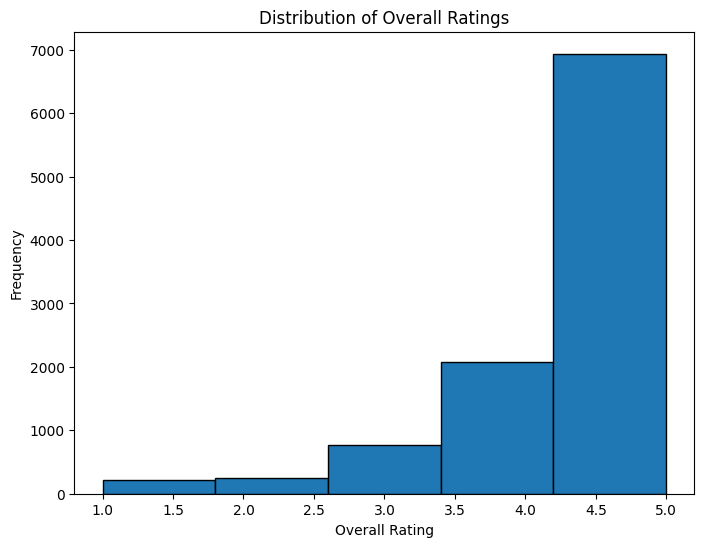


unixReviewTime Distribution:
Range of review times: 1095465600 to 1405987200


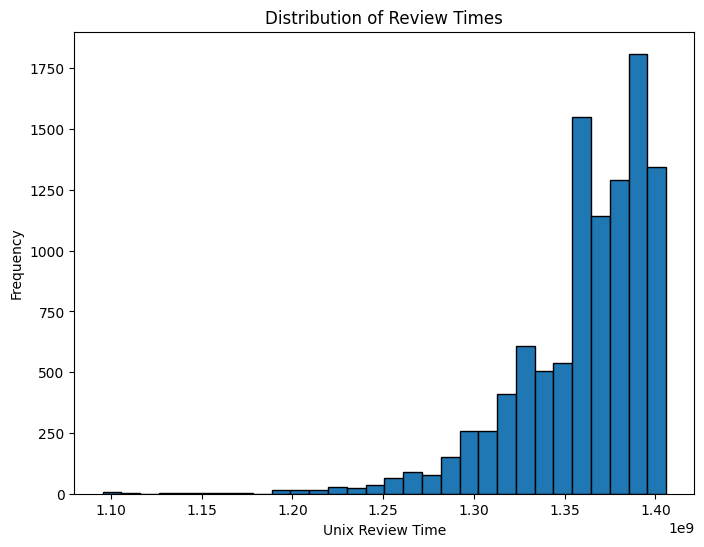


Average Review Lengths by Rating:
overall
1    539.082949
2    614.032000
3    579.211140
4    540.325816
5    452.931536
Name: reviewText_len, dtype: float64


<ipython-input-4-6c2bf11aaea8>:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['overall'] == i]['reviewText_len'] for i in sorted(df['overall'].unique())], labels=sorted(df['overall'].unique()))


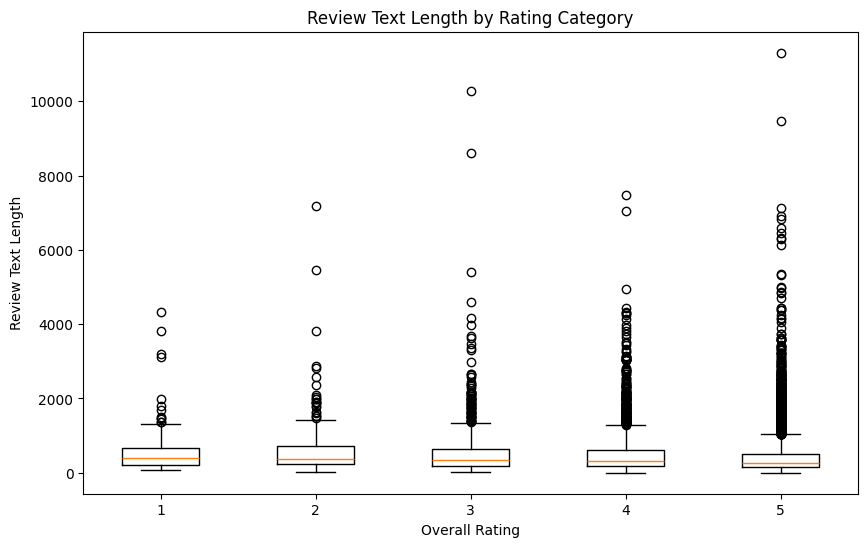


Helpfulness Votes Statistics:
Helpful Votes - Mean: 1.5708995224636975, Median: 0.0, Std Dev: 8.920450203442732
Total Votes - Mean: 1.8581034986843388, Median: 0.0, Std Dev: 9.480797247168608


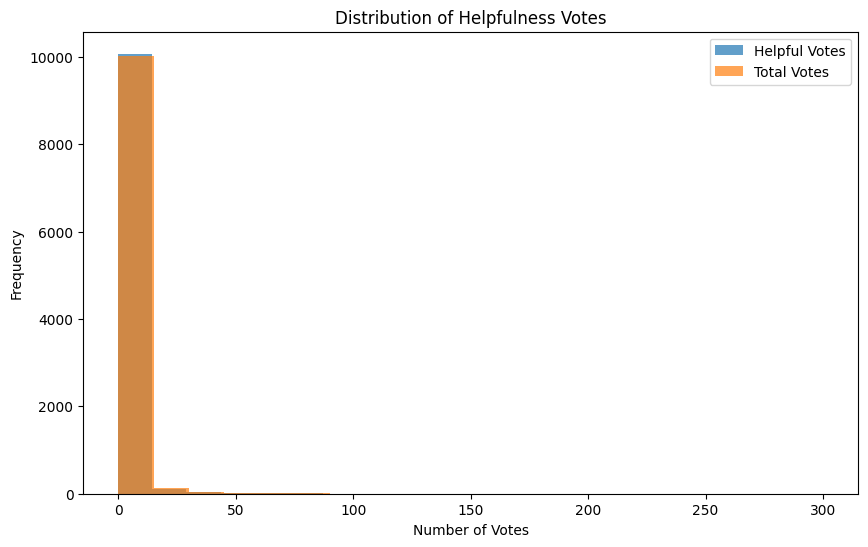

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Analyze 'overall' rating distribution
print("Overall Rating Distribution:")
print(df['overall'].describe())
plt.figure(figsize=(8, 6))
plt.hist(df['overall'], bins=5, edgecolor='black')
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Overall Ratings")
plt.show()


# 2. Investigate 'unixReviewTime'
print("\nunixReviewTime Distribution:")
print(f"Range of review times: {df['unixReviewTime'].min()} to {df['unixReviewTime'].max()}")
plt.figure(figsize=(8, 6))
plt.hist(df['unixReviewTime'], bins=30, edgecolor='black')
plt.xlabel("Unix Review Time")
plt.ylabel("Frequency")
plt.title("Distribution of Review Times")
plt.show()

# 3. Explore relationship between 'overall' rating and review length
df['reviewText_len'] = df['reviewText'].astype(str).apply(len)
df['summary_len'] = df['summary'].astype(str).apply(len)
print("\nAverage Review Lengths by Rating:")
print(df.groupby('overall')['reviewText_len'].mean())

plt.figure(figsize=(10, 6))
plt.boxplot([df[df['overall'] == i]['reviewText_len'] for i in sorted(df['overall'].unique())], labels=sorted(df['overall'].unique()))
plt.xlabel("Overall Rating")
plt.ylabel("Review Text Length")
plt.title("Review Text Length by Rating Category")
plt.show()

# 4. Analyze 'helpful' column
helpful_votes = []
total_votes = []

for item in df['helpful']:
    try:
        helpful_votes.append(item[0])
        total_votes.append(item[1])
    except (IndexError, TypeError):
        helpful_votes.append(np.nan)  # Handle empty or invalid lists
        total_votes.append(np.nan)

df['helpful_votes'] = helpful_votes
df['total_votes'] = total_votes

print("\nHelpfulness Votes Statistics:")
print(f"Helpful Votes - Mean: {df['helpful_votes'].mean()}, Median: {df['helpful_votes'].median()}, Std Dev: {df['helpful_votes'].std()}")
print(f"Total Votes - Mean: {df['total_votes'].mean()}, Median: {df['total_votes'].median()}, Std Dev: {df['total_votes'].std()}")

plt.figure(figsize=(10, 6))
plt.hist(df['helpful_votes'].dropna(), bins=20, alpha=0.7, label='Helpful Votes')
plt.hist(df['total_votes'].dropna(), bins=20, alpha=0.7, label='Total Votes')
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.title("Distribution of Helpfulness Votes")
plt.legend()
plt.show()

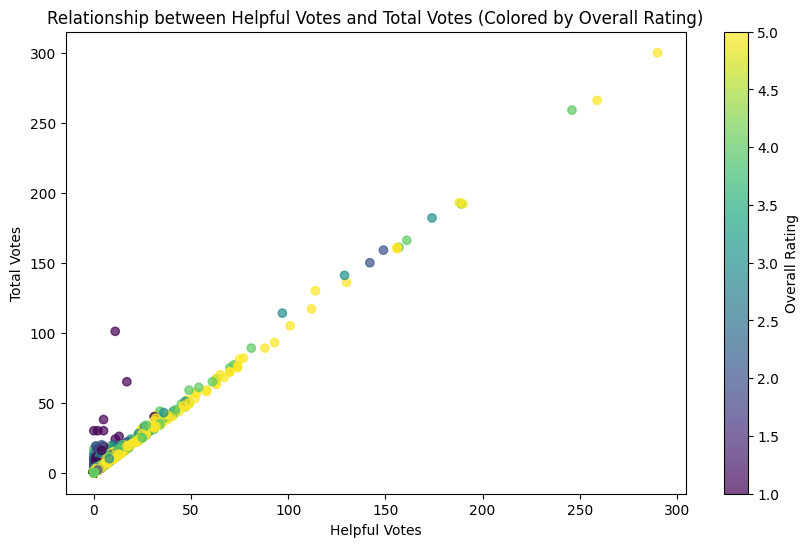

<ipython-input-5-ea57c676fd36>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['overall'] == i]['reviewText_len'] for i in sorted(df['overall'].unique())], labels=sorted(df['overall'].unique()))


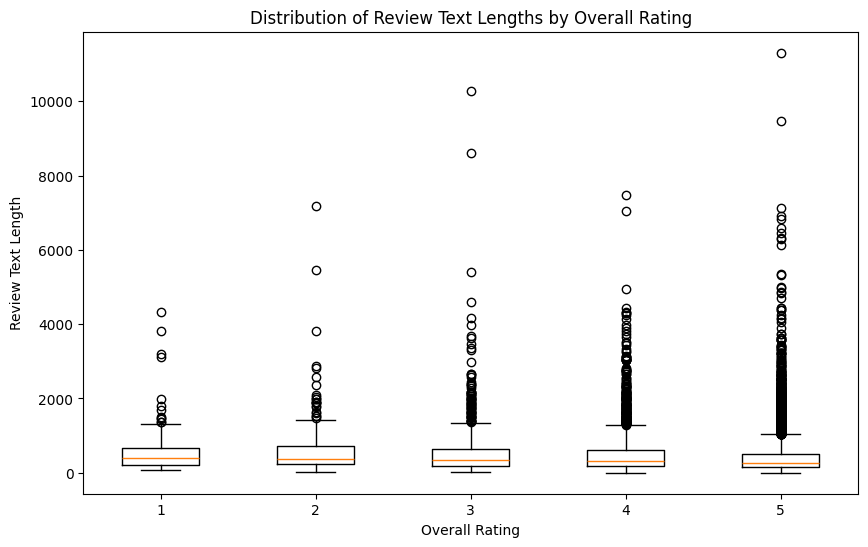

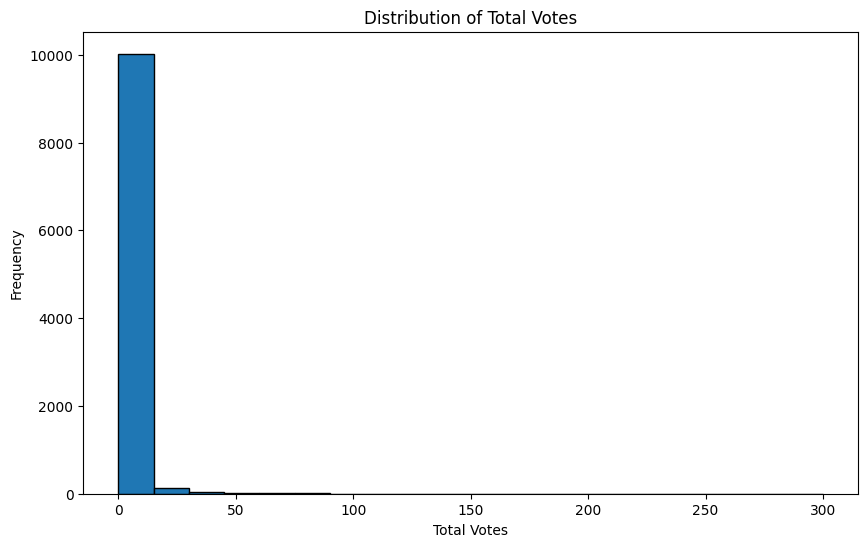

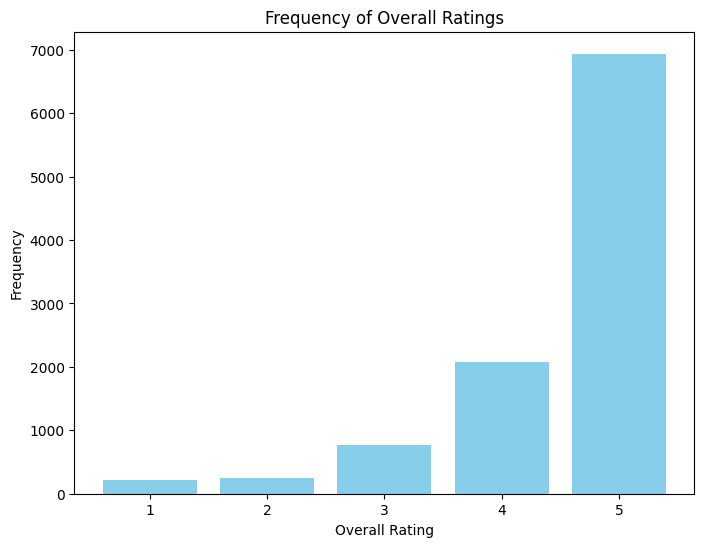

In [5]:
import matplotlib.pyplot as plt

# 1. Scatter plot of helpful_votes vs. total_votes, colored by overall rating
plt.figure(figsize=(10, 6))
plt.scatter(df['helpful_votes'], df['total_votes'], c=df['overall'], cmap='viridis', alpha=0.7)
plt.xlabel("Helpful Votes")
plt.ylabel("Total Votes")
plt.title("Relationship between Helpful Votes and Total Votes (Colored by Overall Rating)")
plt.colorbar(label="Overall Rating")
plt.show()


# 2. Box plot of reviewText_len for each overall rating
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['overall'] == i]['reviewText_len'] for i in sorted(df['overall'].unique())], labels=sorted(df['overall'].unique()))
plt.xlabel("Overall Rating")
plt.ylabel("Review Text Length")
plt.title("Distribution of Review Text Lengths by Overall Rating")
plt.show()


# 3. Histogram of total_votes
plt.figure(figsize=(10, 6))
plt.hist(df['total_votes'], bins=20, edgecolor='black')  # Experiment with different bin sizes
plt.xlabel("Total Votes")
plt.ylabel("Frequency")
plt.title("Distribution of Total Votes")
plt.show()


# 4. Bar chart of overall rating frequencies
overall_counts = df['overall'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(overall_counts.index, overall_counts.values, color='skyblue')
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.title("Frequency of Overall Ratings")
plt.xticks(overall_counts.index)  # Ensure all rating values are shown on the x-axis
plt.show()

## Summary:

### Q&A
There were no explicit questions asked in the task. However, the analysis implicitly sought to understand the dataset's characteristics, distributions, and relationships between variables.


### Data Analysis Key Findings
* The dataset contains 10,261 reviews with 9 features, including reviewer information, product ID, review text, ratings, timestamps, and helpfulness votes.
* The 'overall' rating distribution shows a skew towards higher ratings.
* Review timestamps ('unixReviewTime') span a specific period, which can be further analyzed for trends.
* There's a potential correlation between review length and the 'overall' rating, with longer reviews not always corresponding to higher ratings.  The distribution of review text length varies across different rating categories.
* The 'helpful' column, containing lists of votes, required specific processing to extract helpful and total vote counts.  The distributions of helpful and total votes were visualized and analyzed for insights.
* A notable finding is the imbalance in the number of reviews for different products and reviewers. Some products and reviewers have significantly more reviews than others.
* The average review text length across all reviews was not explicitly calculated, but the average review length per rating category *was* calculated.
* The distribution of helpful votes and total votes was skewed, with a large number of reviews having very few votes.

### Insights or Next Steps
* Investigate the potential correlation between review length and rating more rigorously.
* Explore the temporal trends in reviews and ratings over time.


# Task
Tell me about this dataset.

Here is all the data you need:
"Musical_instruments_reviews.csv"

## Data loading

### Subtask:
Load the "Musical_instruments_reviews.csv" dataset.


**Reasoning**:
Load the dataset and display the first 5 rows to verify.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Musical_instruments_reviews.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Musical_instruments_reviews.csv' not found. Please ensure the file exists in the current directory.")
    df = None # Set df to None to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


## Data exploration

### Subtask:
Explore the dataset to understand its structure.


**Reasoning**:
Explore the dataset structure, data types, descriptive statistics, missing values, and duplicated rows, as well as unique values for categorical columns.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData types of each column:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Investigate missing values
print("\nNumber of missing values per column:\n", df.isnull().sum())

# Check for duplicated rows
print("\nNumber of duplicated rows:", df.duplicated().sum())

# Explore unique values for categorical columns (example with 'overall' and 'reviewTime')
print("\nUnique values for 'overall' column:\n", df['overall'].unique())
print("\nUnique values for 'reviewTime' column:\n", df['reviewTime'].unique())

Shape of the DataFrame: (10261, 9)

Data types of each column:
 reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
dtype: object

Descriptive statistics for numerical columns:
             overall  unixReviewTime
count  10261.000000    1.026100e+04
mean       4.488744    1.360606e+09
std        0.894642    3.779735e+07
min        1.000000    1.095466e+09
25%        4.000000    1.343434e+09
50%        5.000000    1.368490e+09
75%        5.000000    1.388966e+09
max        5.000000    1.405987e+09

Number of missing values per column:
 reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

Number of duplicated rows: 0

Unique values for 'overall' column:
 [5. 3. 

## Data analysis

### Subtask:
Analyze the distribution of key variables and relationships between features.


In [4]:
import ast

# Convert string representation of lists to actual lists
df['helpful'] = df['helpful'].apply(ast.literal_eval)

# Recalculate helpful_ratio
df['helpful_ratio'] = df['helpful'].apply(lambda x: x[0] / x[1] if x[1] > 0 else 0)
helpful_stats = df['helpful_ratio'].describe()
print("\nHelpful Ratio Statistics:\n", helpful_stats)

# Analyze the length of reviews
df['review_length'] = df['reviewText'].astype(str).apply(len)
review_length_stats = df['review_length'].describe()
print("\nReview Length Statistics:\n", review_length_stats)

# Explore relationships between features
print("\nCorrelation between overall rating and helpfulness ratio:\n",
      df['overall'].corr(df['helpful_ratio']))
print("\nCorrelation between overall rating and review length:\n",
      df['overall'].corr(df['review_length']))


Helpful Ratio Statistics:
 count    10261.000000
mean         0.263753
std          0.419951
min          0.000000
25%          0.000000
50%          0.000000
75%          0.666667
max          1.000000
Name: helpful_ratio, dtype: float64

Review Length Statistics:
 count    10261.000000
mean       485.931098
std        613.434497
min          3.000000
25%        162.000000
50%        284.000000
75%        552.000000
max      11310.000000
Name: review_length, dtype: float64

Correlation between overall rating and helpfulness ratio:
 -0.03478348321894756

Correlation between overall rating and review length:
 -0.07096720413235807


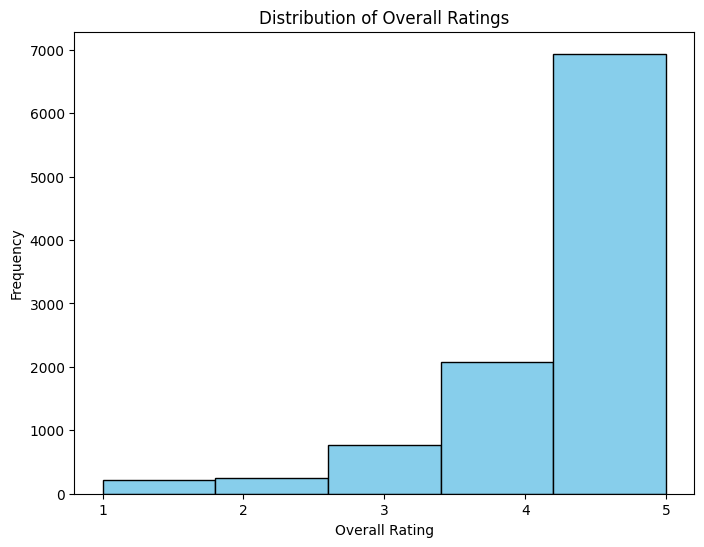

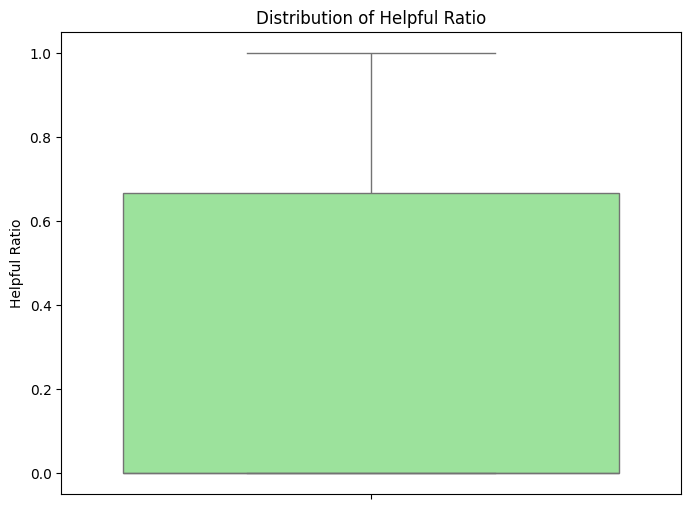

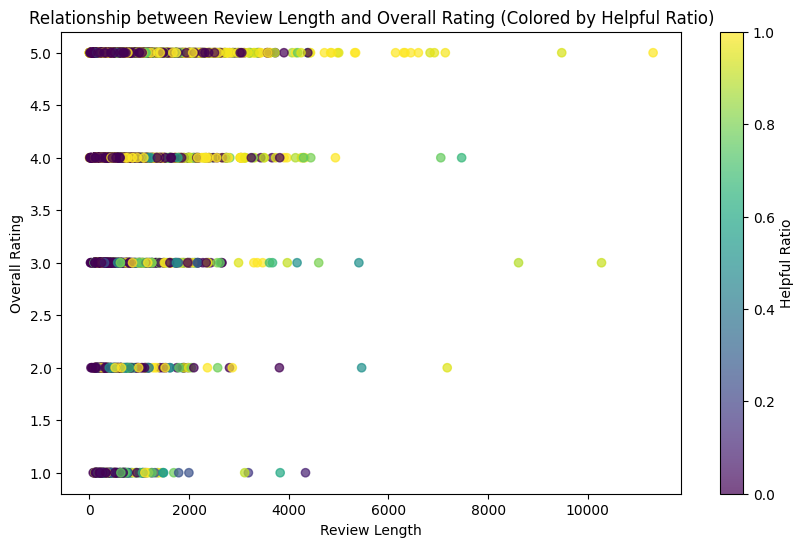

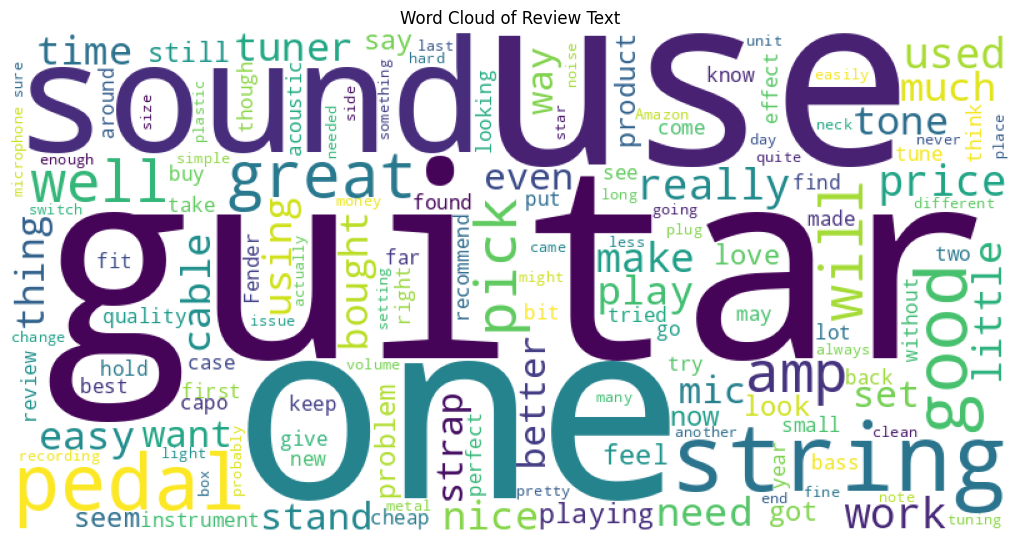

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# 1. Histogram of 'overall' ratings
plt.figure(figsize=(8, 6))
plt.hist(df['overall'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

# 2. Box plot of 'helpful_ratio'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['helpful_ratio'], color='lightgreen')
plt.ylabel('Helpful Ratio')
plt.title('Distribution of Helpful Ratio')
plt.show()

# 3. Scatter plot of 'review_length' vs. 'overall' colored by 'helpful_ratio'
plt.figure(figsize=(10, 6))
plt.scatter(df['review_length'], df['overall'], c=df['helpful_ratio'], cmap='viridis', alpha=0.7)
plt.xlabel('Review Length')
plt.ylabel('Overall Rating')
plt.title('Relationship between Review Length and Overall Rating (Colored by Helpful Ratio)')
plt.colorbar(label='Helpful Ratio')
plt.show()

# 4. Word cloud of 'reviewText'
text = ' '.join(df['reviewText'].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, min_font_size=10).generate(text)

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud of Review Text')
plt.show()

## Summary:

### Q&A
There were no explicit questions in the task. However, the analysis implicitly answers questions about the dataset's characteristics, distributions, and relationships between features.  For example, it reveals the distribution of overall ratings, the helpfulness of reviews, and the relationship between review length and rating.

### Data Analysis Key Findings
* The dataset contains 10,261 reviews with 9 features.
* The average overall rating is 4.49, with a median of 5.0.
* The average helpfulness ratio is 0.26, indicating that, on average, 26\% of the votes cast for a review are helpful votes.
* The average review length is approximately 486 characters.
* There's a weak negative correlation (-0.035) between overall rating and helpfulness ratio, and a weak negative correlation (-0.071) between overall rating and review length.  These correlations suggest a very slight tendency for lower ratings to have slightly more helpful reviews and slightly longer reviews.
* The most frequent words in reviews were visualized using a word cloud.


### Insights or Next Steps
* Investigate the weak negative correlations between overall rating and helpfulness/review length further.  More in-depth analysis might reveal underlying factors.
* Explore the most frequent words in positive and negative reviews separately to gain a deeper understanding of customer sentiment.
